## Lab 4: Gridded data in Python

**Objectives:**
   * We will learn how to read, inspect, and write gridded data using <code>rasterio</code> and <code>xarray</code>.
   * Learn how to index, slice and manipulate our gridded data.
   * Export our data as <code>GeoTIFF</code> or <code>NetCDF</code> format.

We will start by reading/writing some remote sensing data where each band is saved as separate <code>GeoTIFFs</code>. After that, we will read some climate reanalysis data saved as <code>NetCDF</code> format.

The questions are the end of the notebook.

In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

## Read and inspect a Landsat 8 raster layer

In [2]:
# Define filepath
filepath = 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', 'E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/landsat\\inf.tif', 'E

Next, open a single band from your Landsat scene. 

In [3]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

The dataset's **profile** contains number of parameters, several of which are required for georeferencing and writing a new dataset

In [4]:
# Find metadata (e.g. driver, data type, coordinate reference system, transform etc.)
print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1208, 'height': 1422, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 391695.0,
       0.0, -30.0, 4880565.0), 'tiled': False, 'interleave': 'band'}


We can also get some of these parameters separately.

In [5]:
# Find coordinate reference system
src.crs # https://epsg.io/32610

CRS.from_epsg(32610)

In [6]:
# Find format
src.driver

'GTiff'

In [7]:
# Find pixel size
src.transform[0]

30.0

In [8]:
# Find bounds of dataset
src.bounds

BoundingBox(left=391695.0, bottom=4837905.0, right=427935.0, top=4880565.0)

In [9]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[391695.0, 427935.0, 4837905.0, 4880565.0]


In [10]:
# Find number of columns and rows in array
band_1.shape

(1422, 1208)

In [11]:
# Find total number of pixels in array
band_1.size

1717776

In [12]:
# Find maximum value in array
band_1.max()

25983

In [13]:
# Find datatype
band_1.dtype

dtype('uint16')

In [14]:
# Find maximum possible value in array
2**16

65536

In [15]:
# Find file size (in MB)
band_1.nbytes / 1000000

3.435552

***********
## Question 1 (10 points): 

Now that we have gone through some examples in the lecture and lab we are ready to apply some of these methods ourselves. Start by making a **new** `jupyter notebook` called `lab4_submission.ipynb` and complete the following tasks. 

Find the following numbers in the climate reanalysis dataset:

* a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?
* b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

You can use the following table to convert from a **date** to a **day-of-year**: https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html


*******

## Read climate reanalysis data
We usually use the <code>netCDF4</code> or <code>xarray</code> packages for this task.

In [16]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')
xds

<xarray.Dataset>
Dimensions:    (longitude: 233, latitude: 99, time: 1464)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-05 17:55:44 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

This looks a bit overwelming but it nice way to store gridded data. Below is a schematic of what an xarray data structure represents.


<br>
<div>
<img src="E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab4/'
images/xarray_data_structures.png" width="600"/>
</div>

In [17]:
# Print the time period of the data
print('The data ranges from %s to %s' %(xds['t2m']['time'].values.min(), xds['t2m']['time'].values.max()))

The data ranges from 2020-01-01T00:00:00.000000000 to 2020-12-31T18:00:00.000000000


So we know the data spans one year but there are 1464 dimensions in the time variable. This means that the reanalysis data must have a temporal resolution of 6 hours. So before we continue we will resample to daily temporal resolution.

In [18]:
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

### Plot climate reanalysis data for January 31, 2020

Now each layer in the dataset corresponds to a single day. Let's plot the air temperature and cloud cover for the day which the Landsat image was acquired (January 31, 2020 - which is DOY 31).

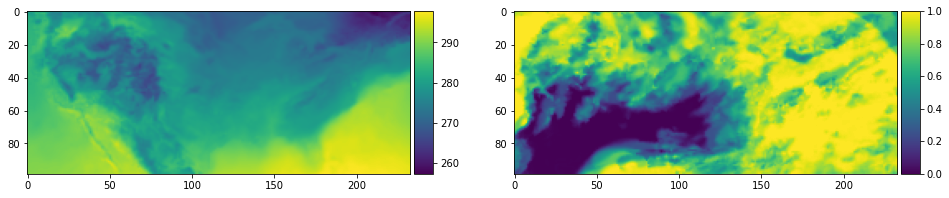

In [19]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(xds_daily['t2m'][31,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax2.imshow(xds_daily['tcc'][31,:,:])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [20]:
# Next, find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

C:\Users\brdeh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\brdeh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


### 1a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?

In [21]:
# Note: Jan 31 is DOY 31
print('Cloud cover in Florence on Jan 31, 2020 = %.2f %%' % (florence_weather['tcc'][30].values * 100))

Cloud cover in Florence on Jan 31, 2020 = 99.98 %


In [22]:
fahrenheit = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (fahrenheit))

Air temperature in Florence on Jan 31, 2020 = 53.82 F


### 1b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

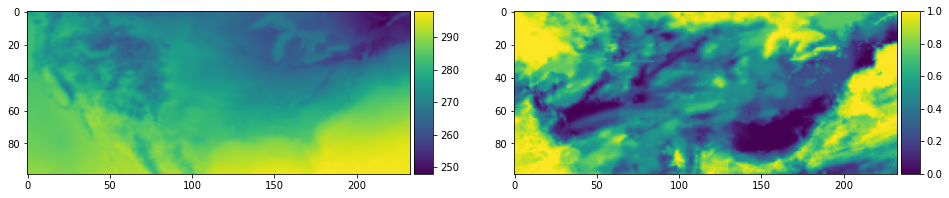

In [23]:
# Plot data for Feb 15th 2020
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(xds_daily['t2m'][45,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax2.imshow(xds_daily['tcc'][45,:,:])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [24]:
# Next, find the index of the grid point nearest a specific lat/lon.   
eugene_weater = xds_daily.sel(latitude=44.0521, longitude=-123.0868, method='nearest')

C:\Users\brdeh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\brdeh\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [25]:
# Note: Feb 15 is DOY 46
print('Cloud cover in Eugene on Feb 15, 2020 = %.2f %%' % (eugene_weater['tcc'][45].values * 100))

Cloud cover in Eugene on Feb 15, 2020 = 99.99 %


In [26]:
fahrenheit = (eugene_weater['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (fahrenheit))

Air temperature in Eugene on Feb 15, 2020 = 42.00 F


*******
## Question 2 (20 points):

Find the following grid cells in the climate reanalysis dataset and provide the lat/lons **and** a rough location of where they are located. 

* a) Highest average air temperature (i.e. hottest place)
* b) Lowest average air temperature (i.e. coldest place)
* c) Highest average cloudiness (i.e. cloudiest place)
* d) Lowest average cloudiest (i.e. least cloudy place)
* e) Place with highest range in **daily** air temperature
* f) Place with the absolute coldest temperature on a single day 

You can copy and paste the lat/lons into Google Maps to find a rough location of where these places are. 

**********

### Question 2a) Highest average air temperature (i.e. hottest place)

In [27]:
# HINT use argmax() or argmin()
max_value = np.mean(xds_daily['t2m'], axis=0).argmax()
index_hot = np.unravel_index(max_value, np.mean(xds_daily['t2m'], axis=0).shape)
print(max_value)
print(index_hot)

<xarray.DataArray 't2m' ()>
array(18928, dtype=int64)
(81, 55)


In [28]:
hottest = np.mean(xds_daily['t2m'][:,index_hot[0], index_hot[1]])
hot_lat = xds_daily.latitude[index_hot[0]]
hot_long = xds_daily.longitude[index_hot[1]]
print('The hottest place on average in this region was %.2f F on average and located at lat: %.2f ,long: %.2f' % (((hottest - 273.15) * 9/5 + 32),hot_lat,hot_long))

The hottest place on average in this region was 79.07 F on average and located at lat: 28.99 ,long: -111.25


The hottest place on average was **Sonora Mexico.**

### Question 2b) Lowest average air temperature (i.e. coldest place)

In [29]:
# HINT use argmax() or argmin()
min_value = np.mean(xds_daily['t2m'], axis=0).argmin()
index_cold = np.unravel_index(min_value, np.mean(xds_daily['t2m'], axis=0).shape)
print(min_value)
print(index_cold)

<xarray.DataArray 't2m' ()>
array(4954, dtype=int64)
(21, 61)


In [30]:
coldest =  np.mean(xds['t2m'][:, index_cold[0], index_cold[1]])
cold_lat = xds_daily.latitude[index_cold[0]]
cold_long = xds_daily.longitude[index_cold[1]]
print('The coldest place on average in this region was %.2f F on average and located at lat: %.2f ,long: %.2f' % (((coldest - 273.15) * 9/5 + 32),cold_lat,cold_long))

The coldest place on average in this region was 29.18 F on average and located at lat: 43.99 ,long: -109.75


The coldest place on average was in **Park County WY**

### Question 2c) Highest average cloudiness (i.e. cloudiest place)

In [31]:
# HINT use argmax() or argmin()
max_value = np.mean(xds_daily['tcc'], axis=0).argmax()
index_cloud = np.unravel_index(max_value, np.mean(xds_daily['tcc'], axis=0).shape)
print(max_value)
print(index_cloud)

<xarray.DataArray 'tcc' ()>
array(0, dtype=int64)
(0, 0)


In [32]:
cloudiest = np.mean(xds_daily['tcc'][:, index_cloud[0], index_cloud[1]])
cloudy_lat = xds_daily.latitude[index_cloud[0]]
cloudy_long = xds_daily.longitude[index_cloud[1]]
print('The cloudiest place on average in this region was %.2f  percent coverage on average and located at lat: %.2f,long: %.2f' % (cloudiest *100,cloudy_lat,cloudy_long))

The cloudiest place on average in this region was 77.15  percent coverage on average and located at lat: 49.24,long: -125.00


The cloudiest place was **sproat lake BC, Canada.**

### Question 2d) Lowest average cloudiest (i.e. least cloudy place)

In [33]:
# HINT use argmax() or argmin()
min_value = np.mean(xds_daily['tcc'], axis=0).argmin()
clear_index = np.unravel_index(min_value, np.mean(xds_daily['tcc'], axis=0).shape)
print(min_value)
print(clear_index)

<xarray.DataArray 'tcc' ()>
array(16584, dtype=int64)
(71, 41)


In [34]:
clearest = np.mean(xds_daily['tcc'][:, clear_index[0], clear_index[1]])
clear_lat = xds_daily.latitude[clear_index[0]]
clear_long = xds_daily.longitude[clear_index[1]]
print('The clearest place on average in this region was %.2f on average and located at lat: %.2f ,long: %.2f' % (clearest*100,clear_lat,clear_long))

The clearest place on average in this region was 16.89 on average and located at lat: 31.49 ,long: -114.75


The clearest place on average was in the **Gulf of CA**.

### Question 2e) Place with highest range in **daily** air temperature

In [35]:
max_range = (np.max(xds_daily['t2m'], axis = 0)- np.min(xds_daily['t2m'], axis = 0)).argmax()
max_value = np.max(np.max(xds_daily['t2m'], axis = 0)- np.min(xds_daily['t2m'], axis = 0))
index_range = np.unravel_index(max_range, (np.max(xds_daily['t2m'], axis = 0)- np.min(xds_daily['t2m'], axis = 0)).shape)
print(max_range)
print(max_value)
print(index_range)

<xarray.DataArray 't2m' ()>
array(443, dtype=int64)
<xarray.DataArray 't2m' ()>
array(57.7585, dtype=float32)
(1, 210)


In [36]:
max_valueF = np.max((np.max(np.max(xds_daily['t2m'], axis = 0) - 273.15) * 9/5 + 32)- (((np.min(xds_daily['t2m'], axis = 0)) - 273.15) * 9/5 + 32))
print(max_valueF)
range_lat = xds_daily.latitude[index_range[0]]
range_long = xds_daily.longitude[index_range[1]]
print('The highest range in temp in this region was %.2f F on average and located at lat: %.2f ,long: %.2f' % ((max_valueF,range_lat,range_long)))

<xarray.DataArray 't2m' ()>
array(133.04608231)
The highest range in temp in this region was 133.05 F on average and located at lat: 48.99 ,long: -72.50


The largest range in daily air temps was in QC, Canada.

### Question 2f) Place with the absolute coldest temperature on a single day 

In [37]:
min_value = np.min(xds_daily['t2m'], axis = 0).argmin()
print(min_value)


<xarray.DataArray 't2m' ()>
array(521, dtype=int64)


In [38]:
# convert 1D index to 2D coords
min_indx = np.unravel_index(min_value, np.min(xds_daily['t2m'], axis =0).shape)
print(min_indx)

(2, 55)


In [39]:
cold = np.min(xds_daily['t2m'][:, min_indx[0], min_indx[1]], axis =0)
cold_lat = xds_daily.latitude[min_indx[0]]
cold_long = xds_daily.longitude[min_indx[1]]
print('Coldest place on Earth for a single day was was %.2f F at lat: %.2f ,long: %.2f' % (((cold - 273.15) * 9/5 + 32), cold_lat, cold_long))

Coldest place on Earth for a single day was was -24.57 F at lat: 48.74 ,long: -111.25


**********

## Question 3 (20 points): 

Display the Landsat image of Florence, OR as:

* a) an **NDVI** image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))
* b) a **color infrared composite** (i.e. bands 5, 4, 3)

*********

### 3a) an **NDVI** image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))
We can compute a Normalized Difference Vegetation Index (NDVI) using the Green and NIR bands. 

NDWI = (Band 5 - Band 4) / (Band 5 + Band 4)

Remember that arrays are zero indexed, so the first layer is corresponds to <code>all_bands[:,:,0]</code>. Also note that we have to make sure our bands are converted to <code>float</code> datatypes.

In [40]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)



In [41]:
all_bands.shape

(1422, 1208, 9)

In [42]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)


In [43]:
# Compute NDVI
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float)))

C:\Users\brdeh\AppData\Local\Temp\ipykernel_26676\235523949.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \


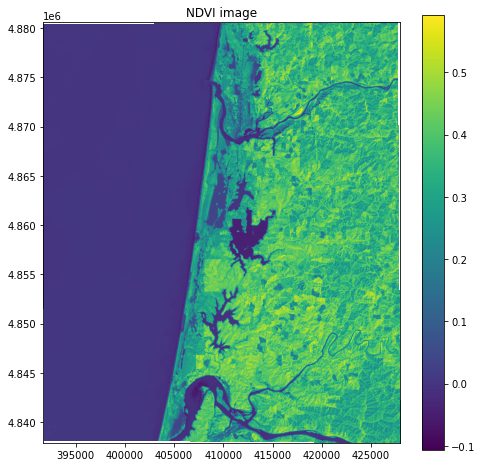

In [44]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

### 3b) a **color infrared composite** (i.e. bands 5, 4, 3)

In [45]:
# Produce a new array by stacking the RGB bands
inf = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))


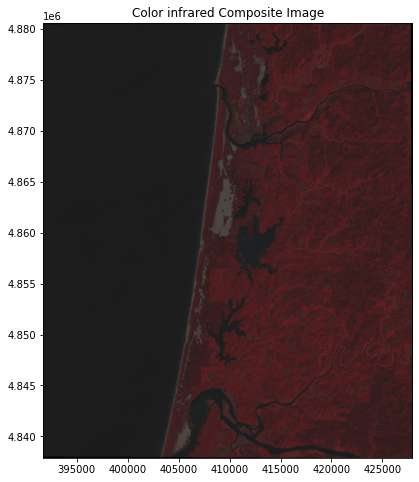

In [46]:
# Plot as infrared composite image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(inf, extent=full_extent)
ax.set_title("Color infrared Composite Image")
plt.show()

In [47]:
# Write an array as a raster band to a new 8-bit file. For the new file's profile, 
# we start with the profile of the source
profile = src.profile

# And then change the band count to 3, set the dtype to uint8, and specify LZW compression.
profile.update(dtype=rasterio.uint8, count=3, compress='lzw')

with rasterio.open(filepath + 'landsat/inf.tif', 'w', **profile) as dst:
    # Write array
    dst.write(np.rollaxis(inf, axis=2)) # Note that array needs to be in bands, rows, cols order (z, y, x)

*********

## Question 4 (for grad students/extra credit)

* a) Produce an NDWI histogram for the Landsat image of Florence 
* b) Choose a threshold and produce a binary water mask
* c) Compute the area of water in the image (including ocean)


## Remember to submit your answers to Questions 1, 2 and 3 **by Friday 11:59pm**

### Question 4a) Produce an NDWI histogram for the Landsat image of Florence

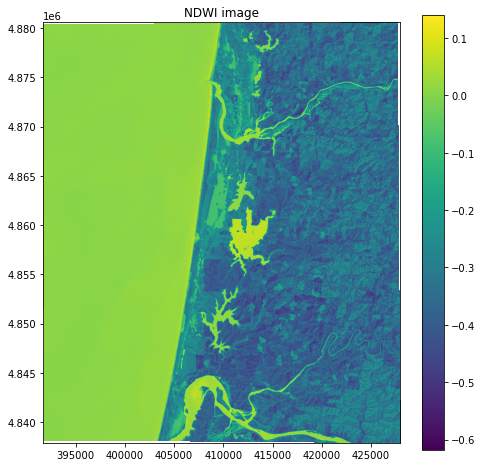

In [48]:
# Compute NDWI
np.seterr(divide='ignore', invalid='ignore')
ndwi = np.divide((all_bands[:,:,2].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,2].astype(float) + all_bands[:,:,4].astype(float)))
# Plot NDWI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndwi, extent=full_extent)
ax.set_title("NDWI image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [49]:
# Insang showed you how to reshape data (collapse into a 1D array)
# flattened_ndwi = np.reshape(ndwi, (ndwi.shape[0] * ndwi.shape[1]))
# #flattened_ndwi
# flattened_ndwi = flattened_ndwi[~np.isnan(flattened_ndwi)]
# #np.isnan(flattened_ndwi)

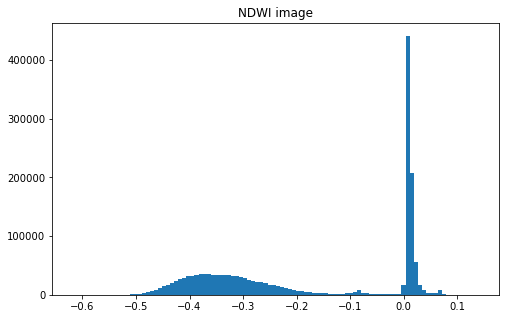

In [50]:
# Plot NDWI histogram
fig, ax = plt.subplots(figsize=(8,5))
im = ax.hist(ndwi[~np.isnan(ndwi)], bins =100)
ax.set_title("NDWI image")
plt.show()

### Question 4b) Choose a threshold and produce a binary water mask


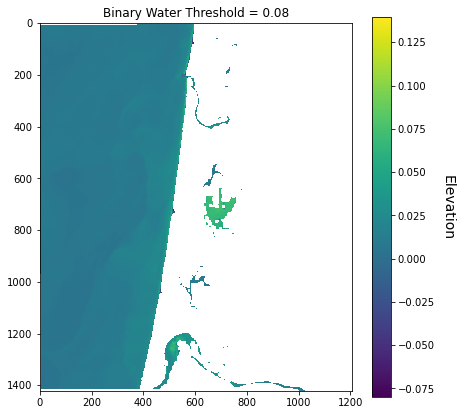

In [57]:
#Threshold of -0.08
#make a mask
thres_mask = np.ma.masked_array(ndwi, mask =(ndwi < -0.08))

fig, ax = plt.subplots(figsize = (7,7))
im = ax.imshow(thres_mask)
ax.set_title("Binary Water Threshold = 0.08")

cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

### Question 4c) Compute the area of water in the image (including ocean)

In [54]:
# 30 meter cell size (landsat)
area_m2 = (30*30)*thres_mask.count()
print('The area of water in the image (including the ocean is %.2f  km^2' %(area_m2/1000000))

The area of water in the image (including the ocean is 713.33  km^2
